In [2]:
#  %matplotlib inline
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import sys
sys.path.append("../scripts")

from local_plot import *
#plt.tight_layout(pad=1.0, w_pad=0.2, h_pad=1.0)
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.rc("figure", figsize=(15,10))


Failed to load Python extension for LZ4 support. LZ4 compression will not be available.


<Figure size 720x360 with 0 Axes>

In [115]:
nodes = [1, 4]
main_id = 1
poses, poses_fused, poses_vo, poses_path, loops, detections, distances,t0 = bag_read(f"/home/xuhao/bags/swarm_raw_parallel2_2021-10-18_16-57/loop_only/swarm1/swarm_local_pc.bag", nodes, True)

Read poses from topic /SwarmNode1/pose
Trajectory total length  30.55370179126154
Read poses from topic /swarm_drones/swarm_drone_fused_pc
Read poses from topic /swarm_drones/swarm_frame
Read poses from topic /SwarmNode4/pose
Trajectory total length  30.456515648784798
Read poses from topic /swarm_drones/swarm_drone_fused_pc
Read poses from topic /swarm_drones/swarm_frame
Read distances from topic /swarm_drones/swarm_frame
Yaw Offset,  0.6530866498537891 Fused Offset [ 2.05828293 -0.52027305  0.15831465]
VIO Offset for 1: [ 2.0576803  -0.51723875  0.16579748]
[ 2.05378103 -0.51919496  0.15962681] [-0.00389927 -0.00195621 -0.00617067]
VIO Offset for 4: [2.06630719 0.49340672 0.13841534]
[2.0585053  0.49764925 0.14027813] [-0.0078019   0.00424253  0.00186279]


In [ ]:
plt.close('all')
#plot_fused(poses, poses_fused, poses_vo, poses_path, loops, detections, nodes, use_offline=True)
plot_fused_err(poses, poses_fused, poses_vo, poses_path, nodes ,show=False,main_id=main_id)
#plot_relative_pose_err(poses, poses_fused, poses_vo, 1, [4])
plt.show()

Outlier rate 18.29% total loops 82 inter_loops 48 outlier_num 15
Pos cov 2.9e-02, 7.9e-02, 3.3e-03
Yaw cov 5.2e-04
PCM loops 46


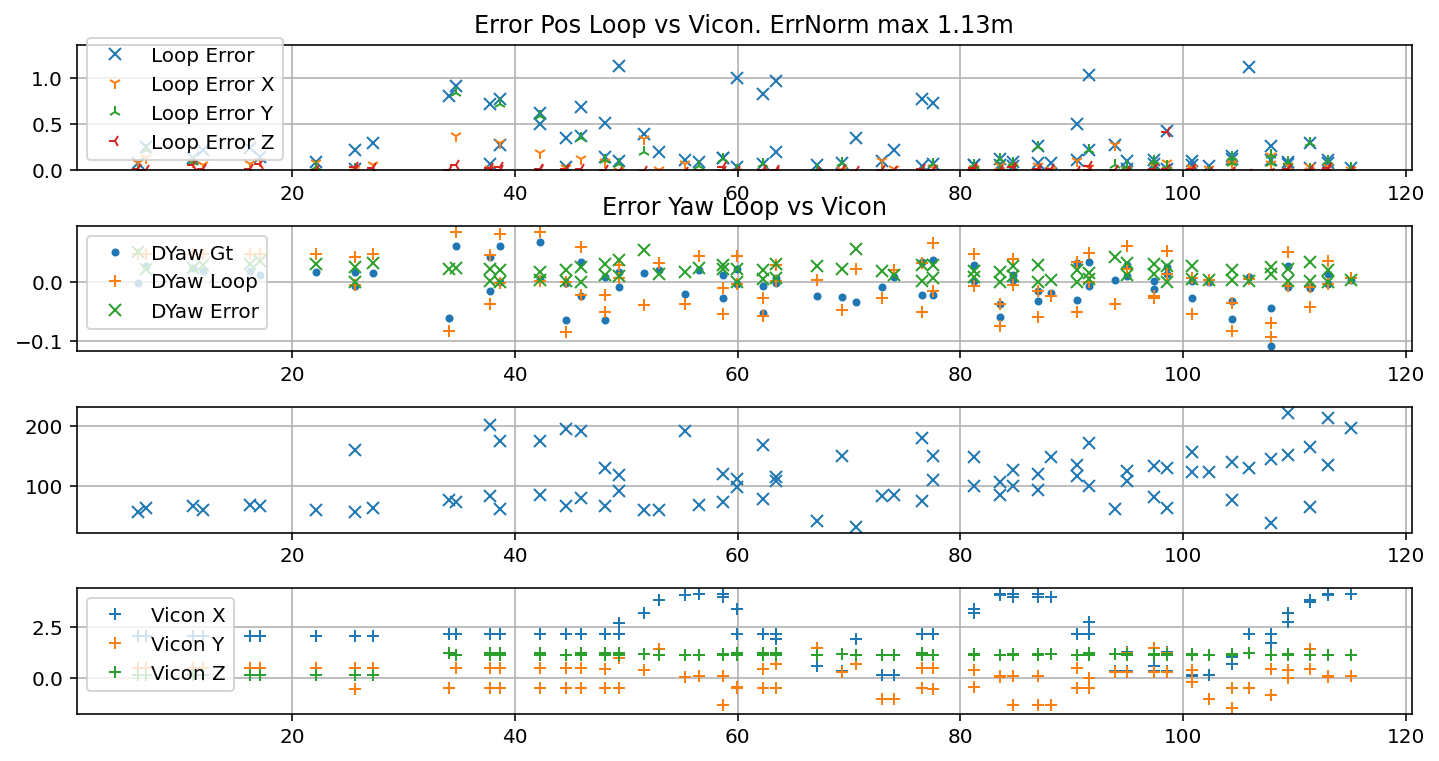

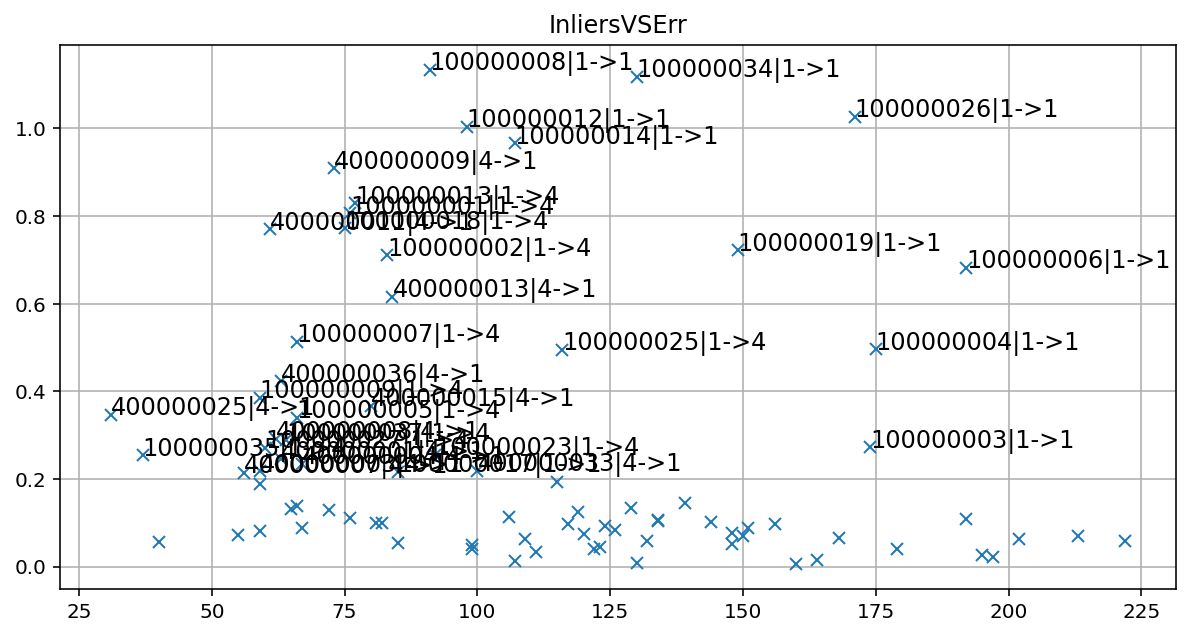

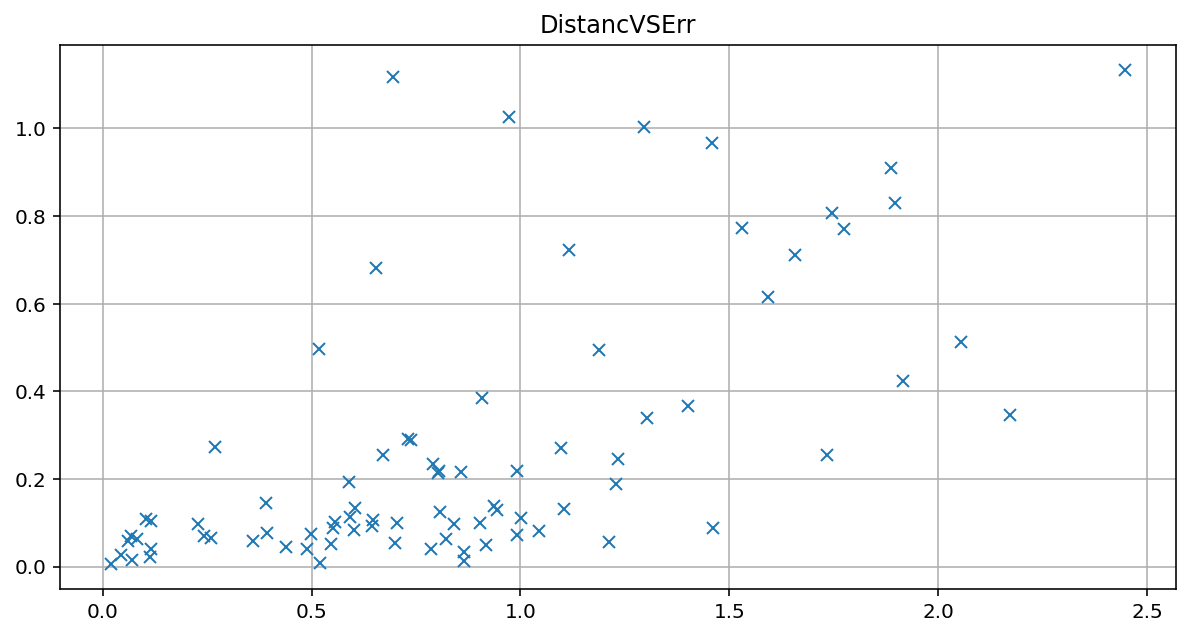

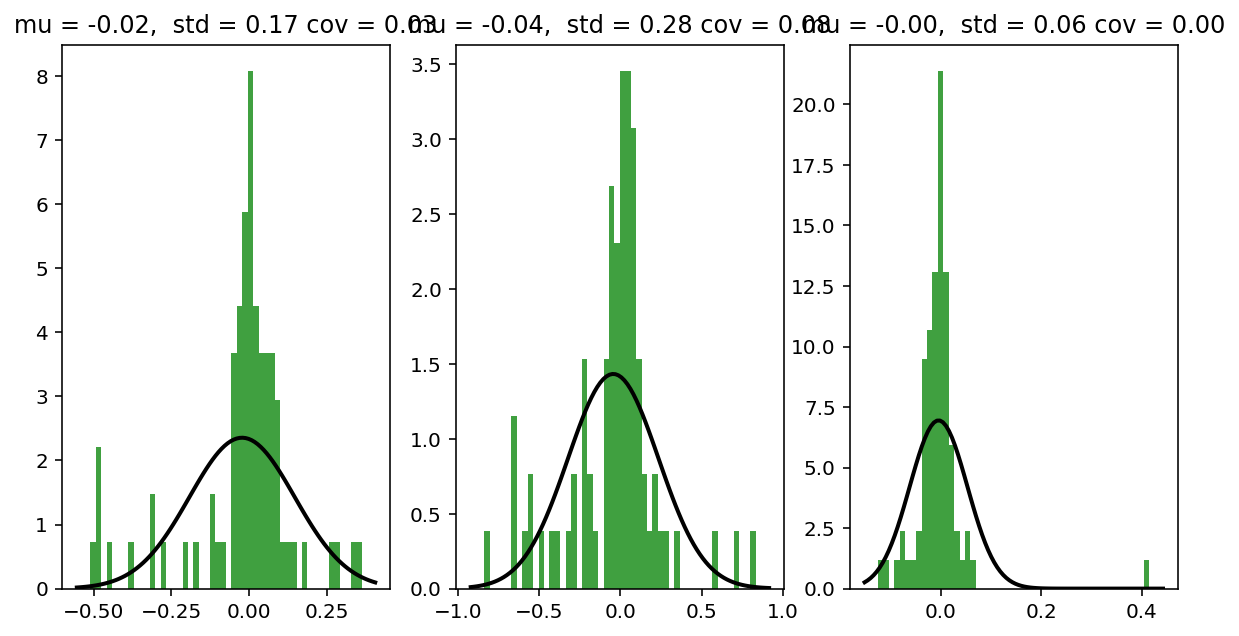

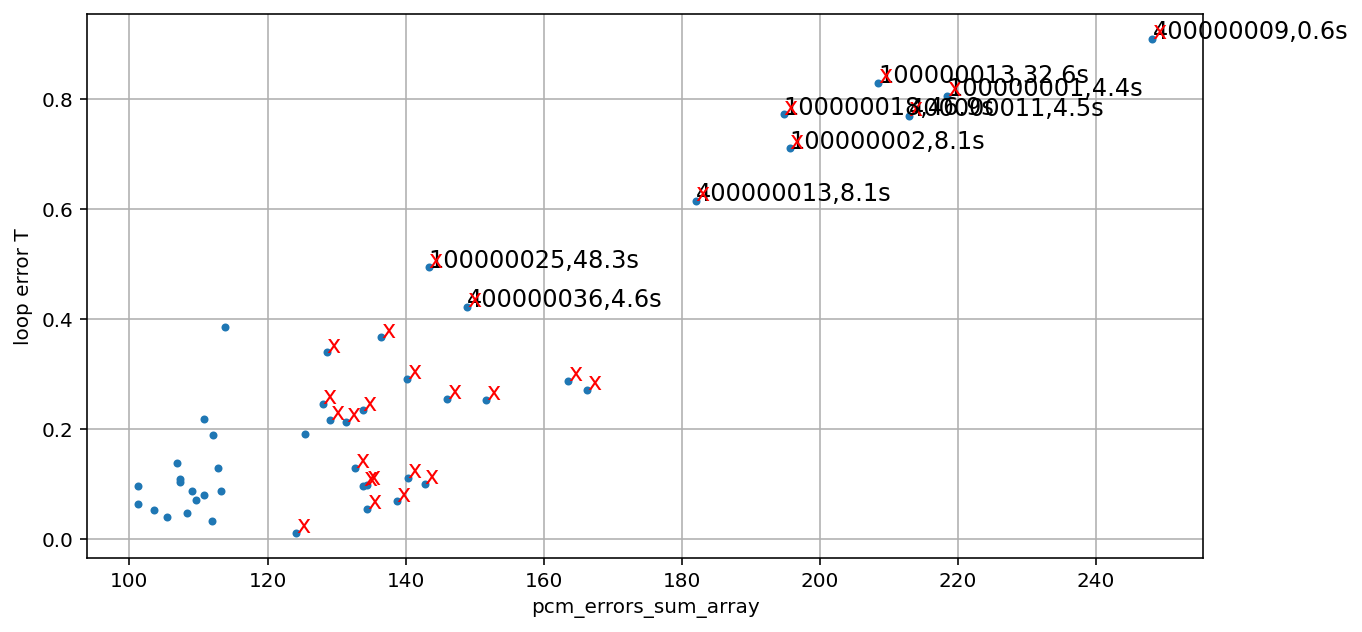

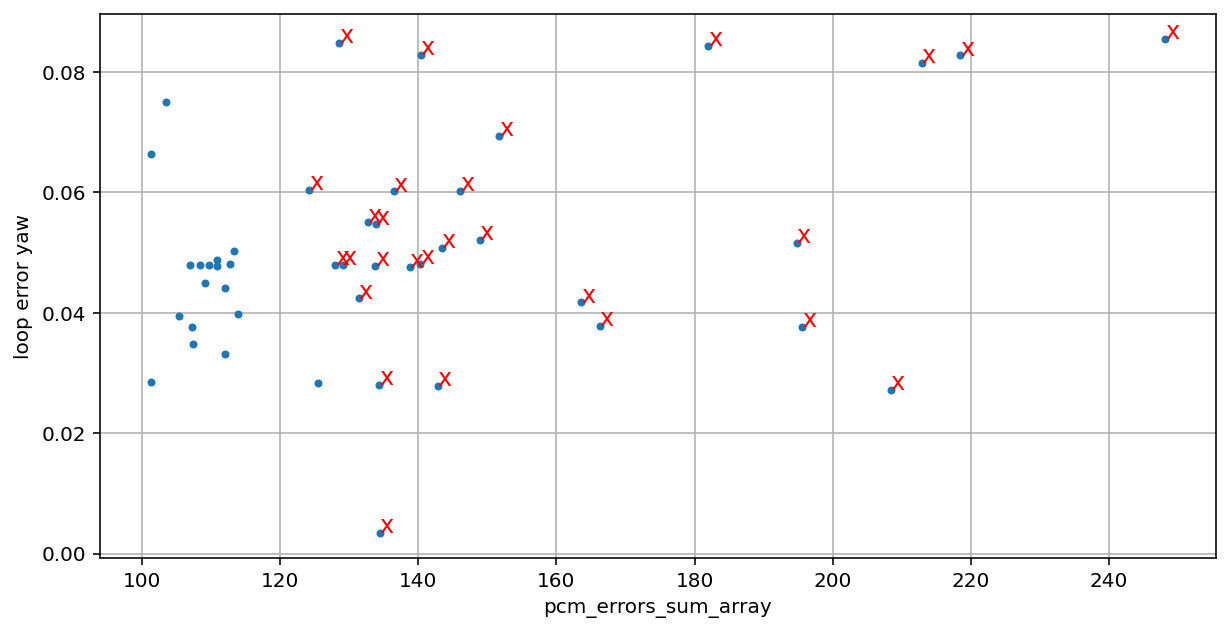

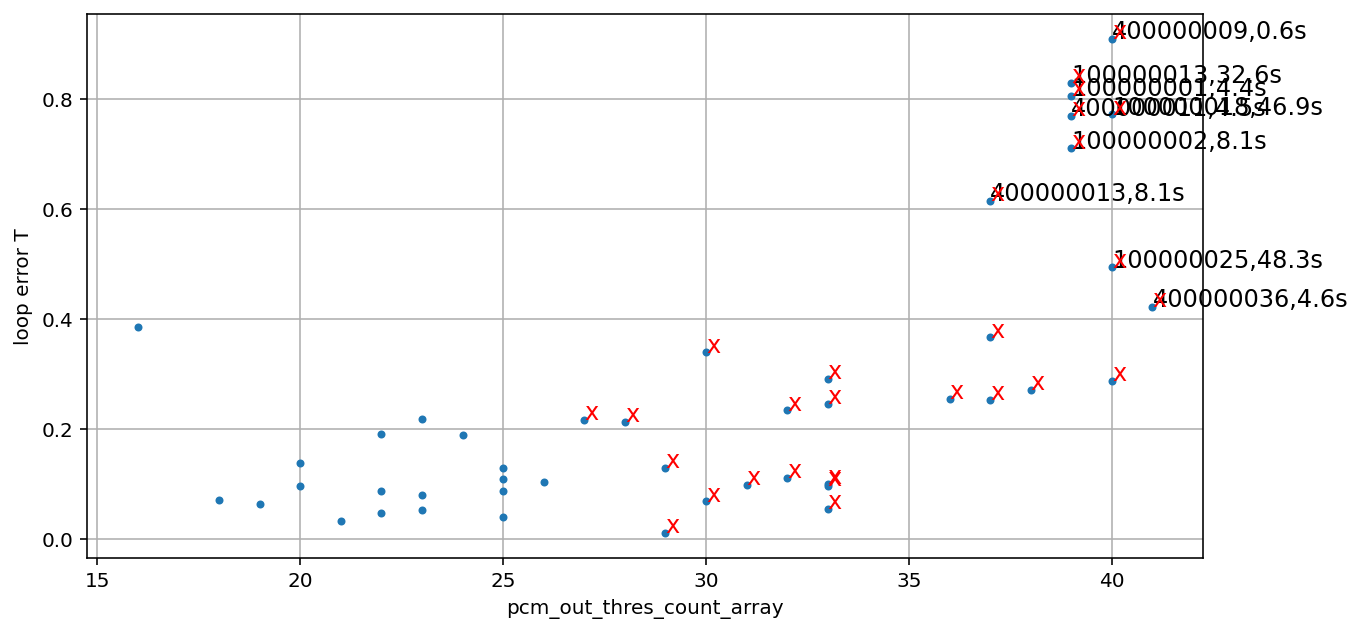

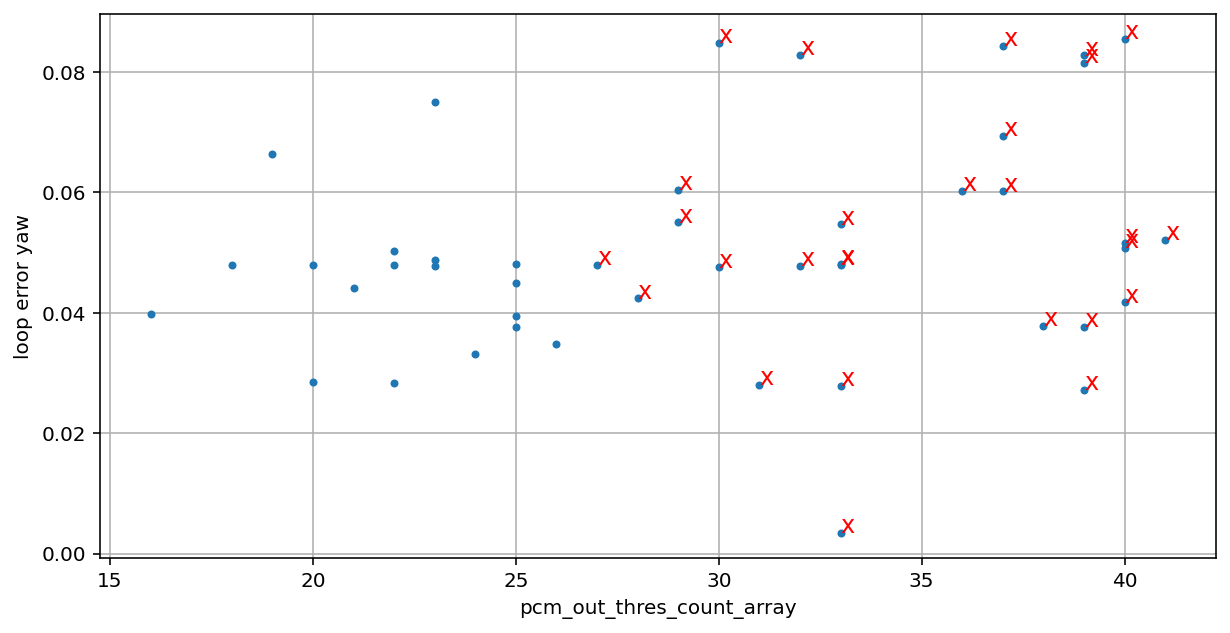

In [116]:
plt.close("all")
loops_error = plot_loops_error(poses, loops, outlier_thres=1.0)
pcm_errors = debugging_pcm("/home/xuhao/bags/swarm_raw_parallel2_2021-10-18_16-57/loop_only/swarm1/", loops_error, 2.204)

Outlier rate 15.00% total loops 60 inter_loops 37 outlier_num 9
Pos cov 3.3e-02, 9.0e-02, 2.0e-03
Yaw cov 7.2e-04
PCM loops 32


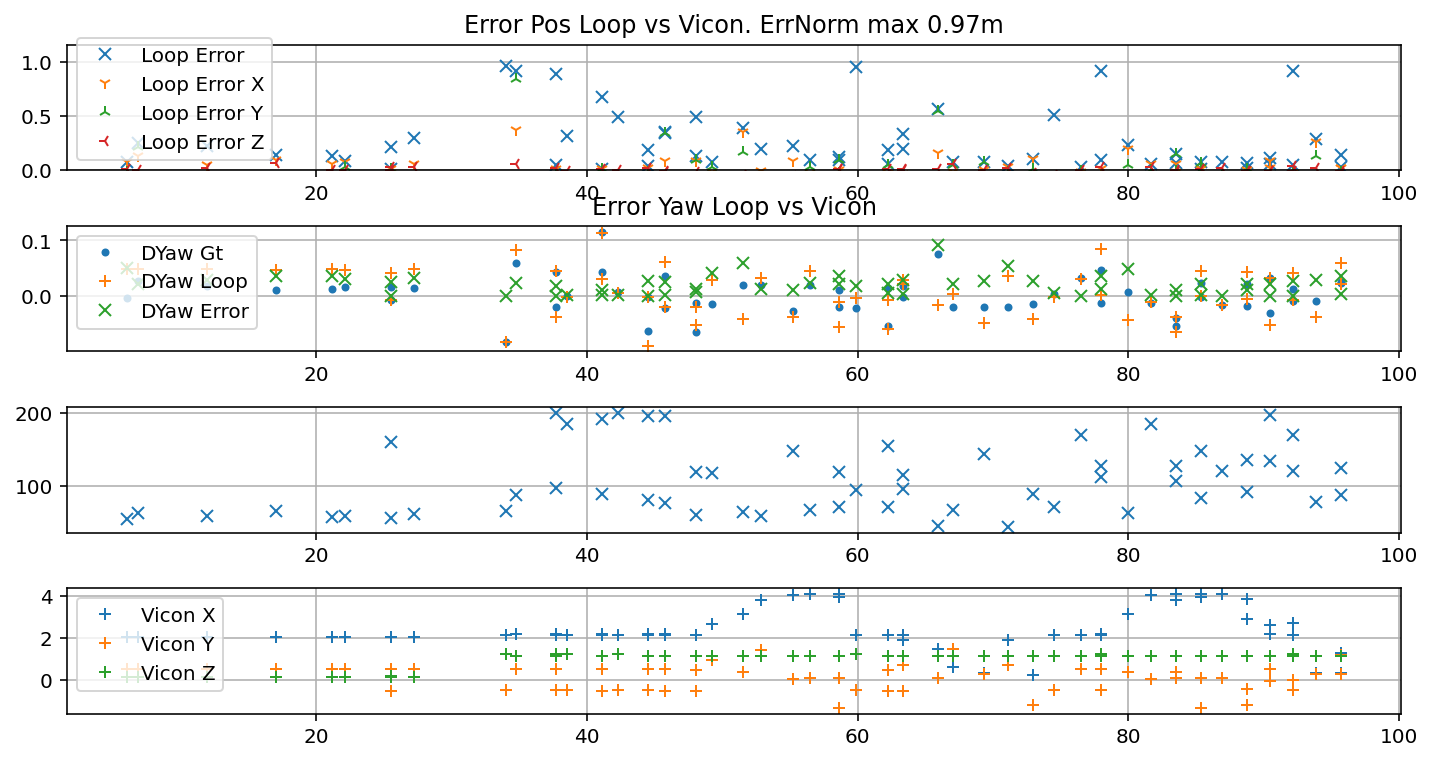

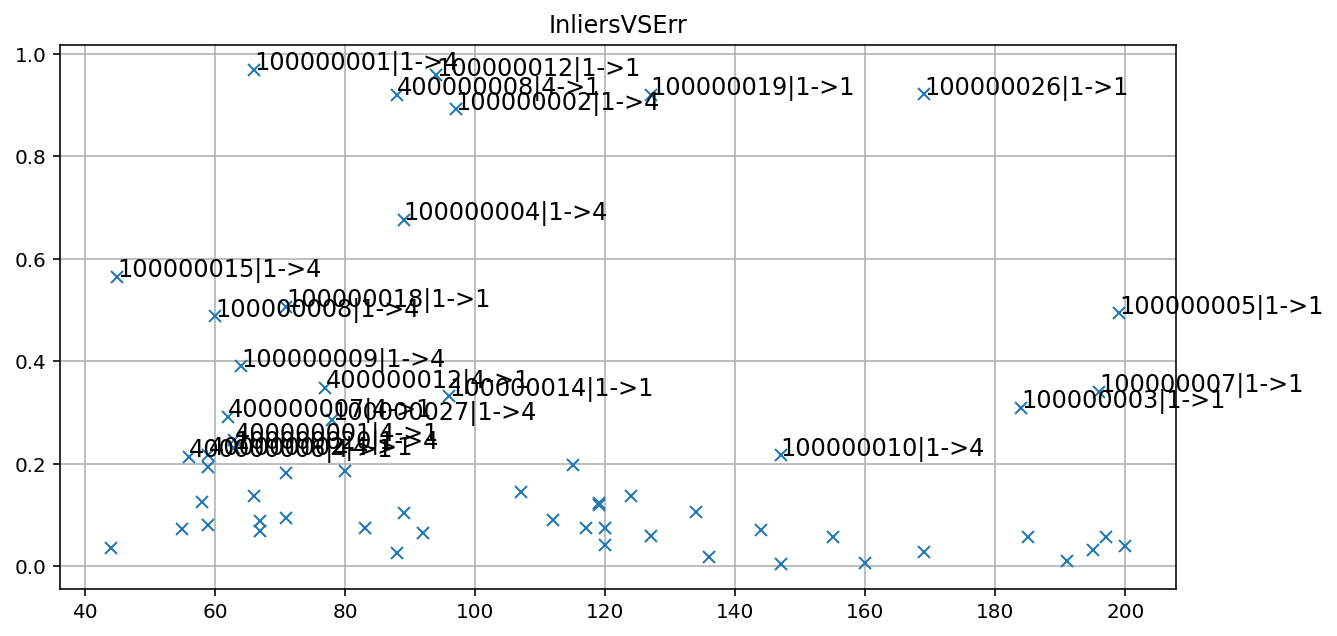

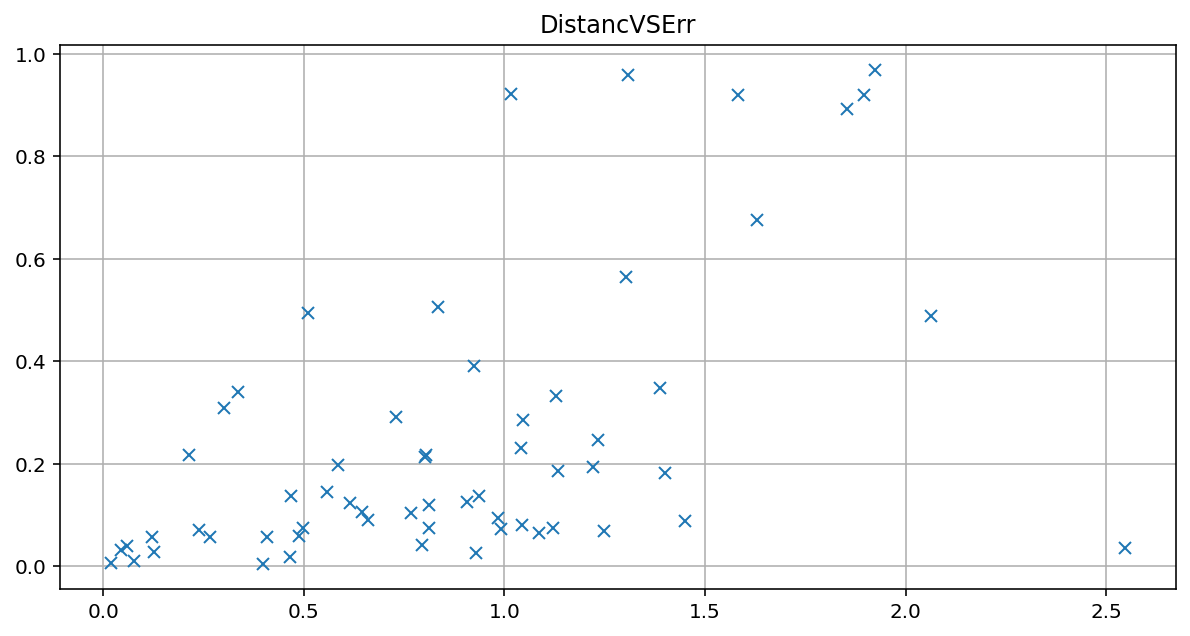

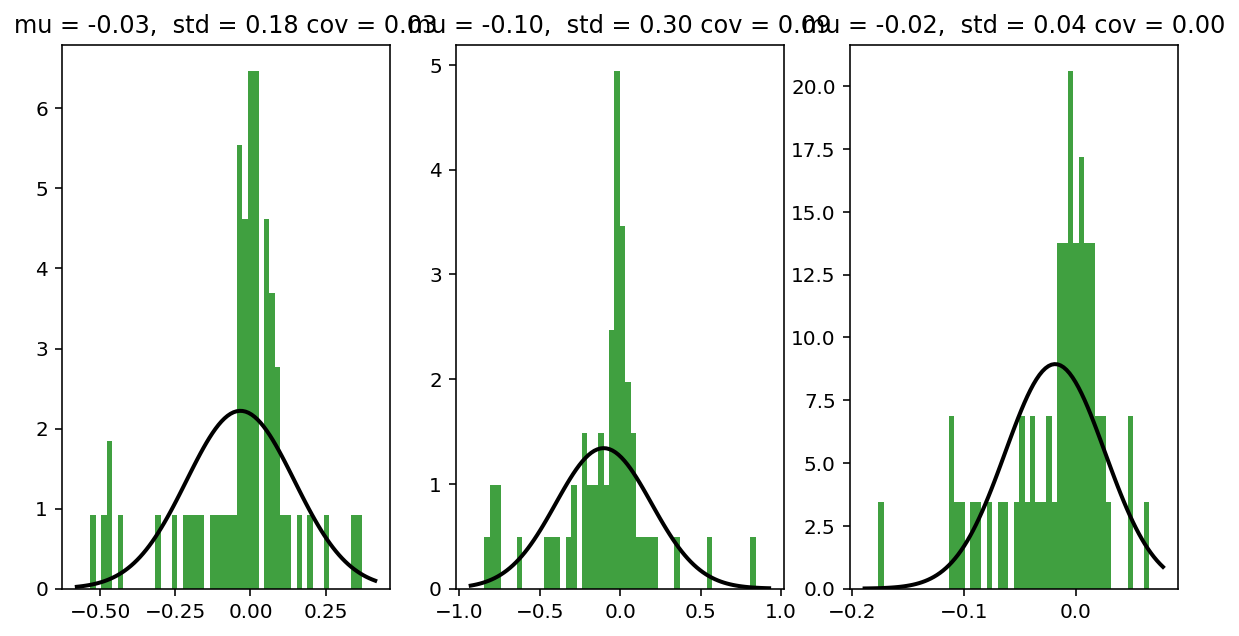

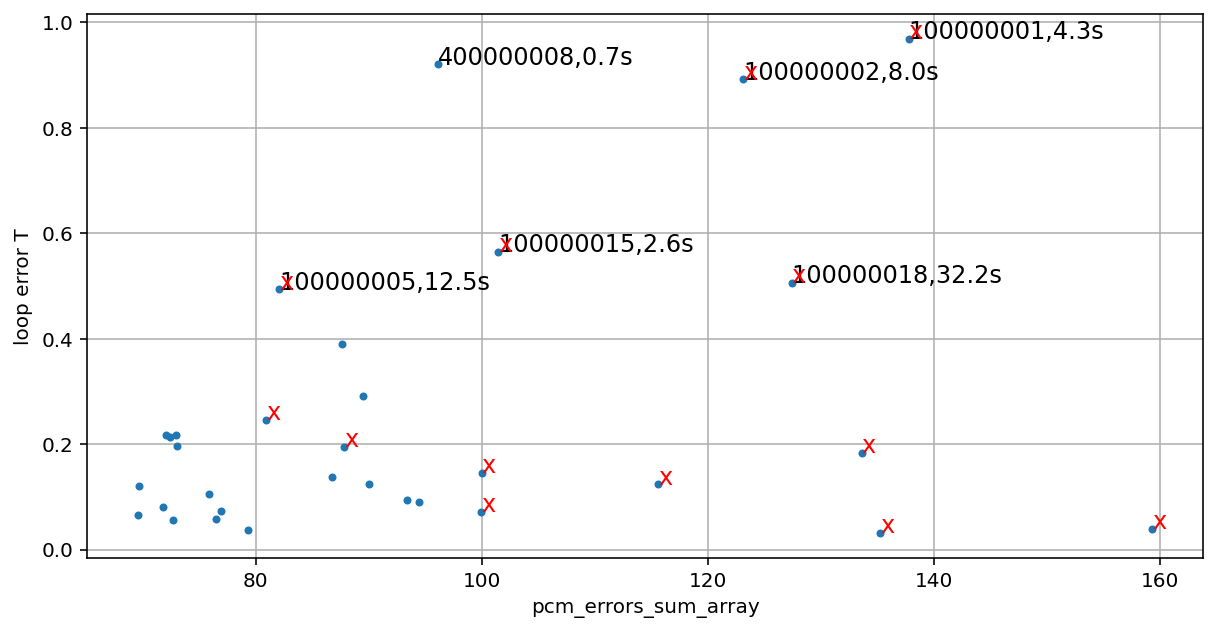

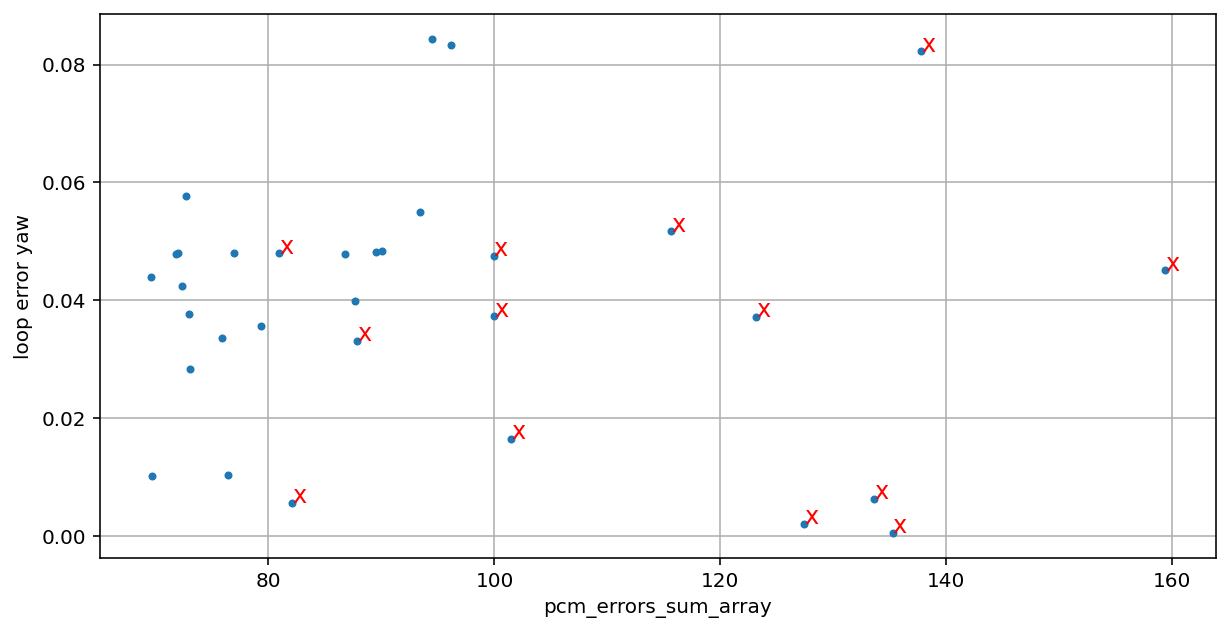

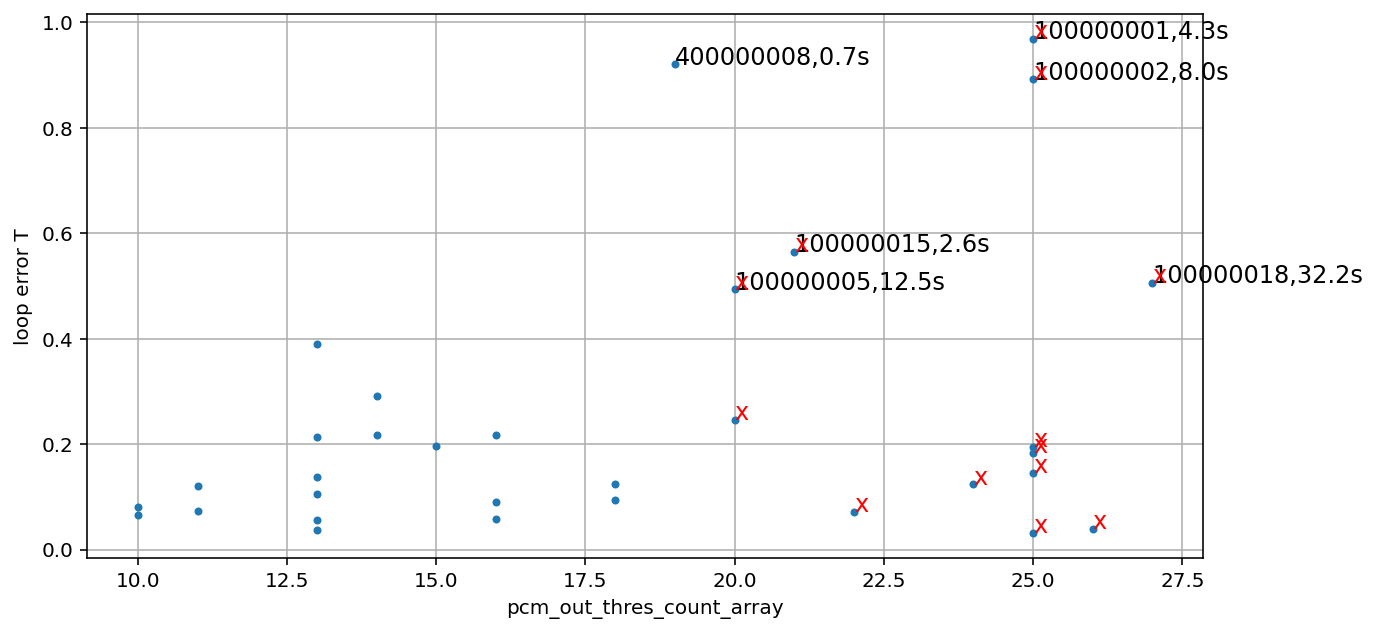

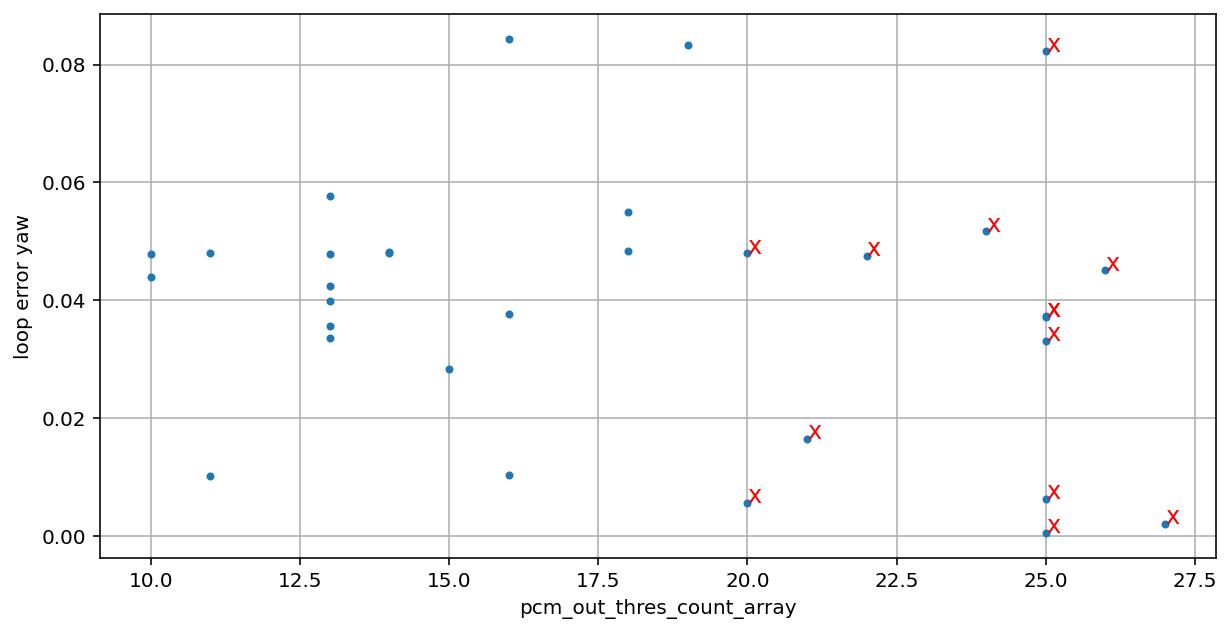

In [114]:
plt.close("all")
loops_error = plot_loops_error(poses, loops, outlier_thres=1.0)
pcm_errors = debugging_pcm("/home/xuhao/bags/swarm_raw_parallel2_2021-10-18_16-57/loop_only/swarm1/", loops_error, 2.204)